In [18]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
import numpy as np
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import numpy as np

In [4]:
MP_Physical_Properties = pd.read_csv("/home/kumail/Energy_AI/1 Materials AI/General_Model/Feature_Extraction/1-s2.0-S2352847822000545-mmc1.csv")
MP_Physical_Properties

,RA,RB,ENA,ENB,ENR,H,He,Li,Be,B,...,Cm,Bk,Cf,Es,Fm,Md,No,Lr,avg ionic char,Nature of Bandgap
0,1.05,1.18,1.25,0.95,-3.306393,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.179242,0
1,1.12,0.27,1.10,2.04,-1.117357,0,0,0.0,0.0,0.2,...,0,0,0,0,0,0,0,0,0.143887,0
2,0.80,0.71,1.66,1.30,-1.935072,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.148737,0
3,0.83,0.78,1.30,1.83,-2.031679,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.141753,0
4,1.08,0.65,1.22,1.55,-2.042928,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.156943,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,1.49,0.89,2.33,1.38,-2.542464,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.118354,1
5936,0.68,0.80,2.05,1.78,-1.783143,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.106437,1
5937,0.90,0.97,1.65,2.10,-2.242536,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.111511,1
5938,0.89,0.71,1.33,1.30,-2.087536,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.162391,1


In [5]:
duplicate_rows = MP_Physical_Properties[MP_Physical_Properties.duplicated()]

# Select the first 614 duplicate rows
rows_to_drop = duplicate_rows.iloc[:614].index

# Drop these specific rows from the DataFrame
MP_Physical_Properties = MP_Physical_Properties.drop(index=rows_to_drop)

In [6]:
MP_Physical_Properties

,RA,RB,ENA,ENB,ENR,H,He,Li,Be,B,...,Cm,Bk,Cf,Es,Fm,Md,No,Lr,avg ionic char,Nature of Bandgap
0,1.05,1.18,1.25,0.95,-3.306393,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.179242,0
1,1.12,0.27,1.10,2.04,-1.117357,0,0,0.0,0.0,0.2,...,0,0,0,0,0,0,0,0,0.143887,0
2,0.80,0.71,1.66,1.30,-1.935072,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.148737,0
3,0.83,0.78,1.30,1.83,-2.031679,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.141753,0
4,1.08,0.65,1.22,1.55,-2.042928,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.156943,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,1.49,0.89,2.33,1.38,-2.542464,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.118354,1
5936,0.68,0.80,2.05,1.78,-1.783143,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.106437,1
5937,0.90,0.97,1.65,2.10,-2.242536,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.111511,1
5938,0.89,0.71,1.33,1.30,-2.087536,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.162391,1


In [7]:
X = MP_Physical_Properties.drop(columns=['Nature of Bandgap'])
Y = MP_Physical_Properties['Nature of Bandgap']

In [5]:
import pandas as pd
from scipy.stats import pointbiserialr
correlations = {}
for column in X.columns:
    correlation, p_value = pointbiserialr(X[column], Y)
    correlations[column] = {'correlation': correlation, 'p_value': p_value}

# Convert to a DataFrame for better visualization
correlation_df = pd.DataFrame.from_dict(correlations, orient='index')
print(correlation_df)

                           correlation       p_value
crystal_system                0.156757  3.728035e-15
nsites                        0.251088  4.446847e-37
volume                        0.207042  1.710629e-25
density                      -0.062587  1.788252e-03
spg_num                      -0.239331  9.558824e-34
a                             0.156652  3.889609e-15
b                             0.226979  1.956214e-30
c                             0.217918  3.965591e-28
alpha                         0.001121  9.554120e-01
beta                          0.008318  6.783512e-01
gamma                         0.028664  1.529025e-01
formation_energy_per_atom    -0.205591  3.748296e-25
band_gap                      0.353477  4.017977e-74
is_stable                     0.054915  6.146718e-03
energy_above_hull            -0.150400  4.660359e-14
is_metal                     -0.400198  2.390661e-96
is_magnetic                  -0.201086  4.120755e-24
total_magnetization           0.011205  5.7639

In [7]:
significant_features = correlation_df[correlation_df['p_value'] < 0.05].index.tolist()

# Reduced dataset with only significant features
X_significant = X[significant_features]

print("Selected Significant Features:", significant_features)

Selected Significant Features: ['crystal_system', 'nsites', 'volume', 'density', 'spg_num', 'a', 'b', 'c', 'formation_energy_per_atom', 'band_gap', 'is_stable', 'energy_above_hull', 'is_metal', 'is_magnetic', 'PC3', 'PC_emb_magpie4', 'PC_emb_magpie_sc1', 'PC_emb_mat2vec_PC2', 'PC_emb_matscholar_PC1', 'emb_mod_petti_sc_PC1', 'emb_random_200_PC2']


In [8]:
def split_and_scale_data(X, Y, test_size=0.2, val_size=0.05, random_state=42):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")
    print(f"After preprocessing Training set size: {X_train.shape}")
    print(f"After preprocessing Test set size: {X_test.shape}")
    
    return X_train,  X_test, Y_train, Y_test
X_train_scaled,  X_test_scaled, Y_train, Y_test = split_and_scale_data(X, Y)

Training set size: 4260
Test set size: 1066
After preprocessing Training set size: (4260, 109)
After preprocessing Test set size: (1066, 109)


In [9]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, Y_train)

print("Class distribution after over-sampling:", Counter(y_resampled))

Class distribution after over-sampling: Counter({0: 2387, 1: 2387})


In [ ]:
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = SVC(probability=True, random_state=42)
clf4 = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
clf5 = lgb.LGBMClassifier(random_state=42)
clf6 = RandomForestClassifier(n_estimators=500, random_state=42)
clf9 = GradientBoostingClassifier(random_state=42)
clf10 = AdaBoostClassifier(random_state=42)
clf11 = cb.CatBoostClassifier(silent=True, random_state=42)

# Define a neural network using MLPClassifier
clf12 = MLPClassifier(hidden_layer_sizes=(32, 64), activation='relu', solver='adam',
                      max_iter=1000, random_state=42)

# Ensemble with voting
voting_clf = VotingClassifier(
    estimators=[ ('dt', clf2), ('svc', clf3), ('xgb', clf4), ('lgbm', clf5),
                ('rf', clf6), ('gb', clf9), ('ab', clf10), 
                ('catboost', clf11), ('mlp', clf12)],
    voting='hard'  # Use soft voting for probability-based ensemble
)

# Train the voting classifier
voting_clf.fit(X_resampled, y_resampled )

# Evaluate on test set
y_test_pred = voting_clf.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, y_test_pred)
print(f'Voting Classifier with MLP Accuracy on Test Set: {accuracy:.4f}')


Voting Classifier with MLP Accuracy on Test Set: 0.9193


              precision    recall  f1-score   support

           0       0.91      0.99      0.95       628
           1       0.99      0.90      0.94       560

    accuracy                           0.95      1188
   macro avg       0.95      0.94      0.95      1188
weighted avg       0.95      0.95      0.95      1188



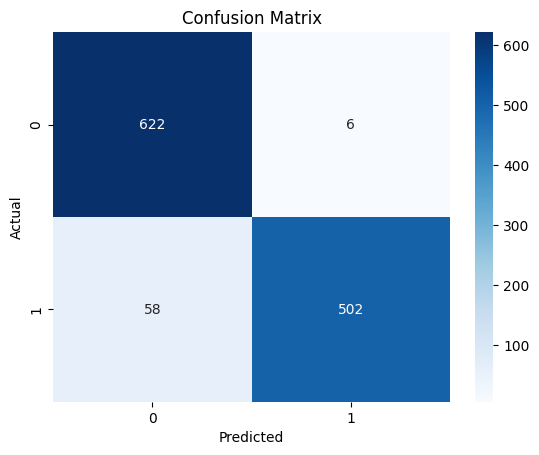

In [10]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_test_pred))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
models = [clf2, clf3, clf4, clf5, clf6, clf9, clf10, clf11, clf12]
model_names = ['DecisionTree', 'SVC', 'XGB', 'LGBM', 'RF', 'GradientBoosting', 'AdaBoost', 'CatBoost', 'MLP']

for clf, name in zip(models, model_names):
    clf.fit(X_train_scaled, Y_train)
    y_pred = clf.predict(X_test_scaled)
    acc = accuracy_score(Y_test, y_pred)
    print(f'{name} Accuracy: {acc:.4f}')


DecisionTree Accuracy: 0.9437
SVC Accuracy: 0.8114
XGB Accuracy: 0.9418
LGBM Accuracy: 0.9306
RF Accuracy: 0.9587
GradientBoosting Accuracy: 0.8621
AdaBoost Accuracy: 0.8208
CatBoost Accuracy: 0.9390
MLP Accuracy: 0.9184


In [14]:
clf1 = ExtraTreesClassifier(n_estimators=500, random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = SVC(probability=True, random_state=42)
clf4 = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
clf5 = lgb.LGBMClassifier(random_state=42)
clf6 = RandomForestClassifier(n_estimators=500, random_state=42)
clf9 = GradientBoostingClassifier(random_state=42)
clf10 = AdaBoostClassifier(random_state=42)
clf11 = cb.CatBoostClassifier(silent=True, random_state=42)
clf12 = MLPClassifier(hidden_layer_sizes=(32, 64), activation='relu', solver='adam',
                      max_iter=1000, random_state=42)

# Stacking ensemble
stacking_clf = StackingClassifier(
    estimators=[
         ('et', clf1), ('dt', clf2), ('svc', clf3), ('xgb', clf4), 
        ('lgbm', clf5), ('rf', clf6), ('gb', clf9), 
        ('ab', clf10), ('catboost', clf11), ('mlp', clf12)
    ],
    final_estimator=lgb.LGBMClassifier(random_state=42)
)

# Train the stacking classifier
stacking_clf.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = stacking_clf.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")

Stacking Classifier Accuracy: 0.9794


In [15]:
import joblib
joblib.dump(stacking_clf, '/home/kumail/Energy_AI/1 Materials AI/General_Model/Stacking_model/baseline_band_gap_nature_stacking_classifier.pkl')

['/home/kumail/Energy_AI/1 Materials AI/General_Model/Stacking_model/baseline_band_gap_nature_stacking_classifier.pkl']

In [16]:
stacking_clf = joblib.load('/home/kumail/Energy_AI/1 Materials AI/General_Model/Stacking_model/baseline_band_gap_nature_stacking_classifier.pkl')

# Predict on the test data
y_pred = stacking_clf.predict(X_test_scaled)

# Evaluate the accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")

Stacking Classifier Accuracy: 0.9794


              precision    recall  f1-score   support

           0       1.00      0.96      0.98       483
           1       0.97      1.00      0.98       583

    accuracy                           0.98      1066
   macro avg       0.98      0.98      0.98      1066
weighted avg       0.98      0.98      0.98      1066



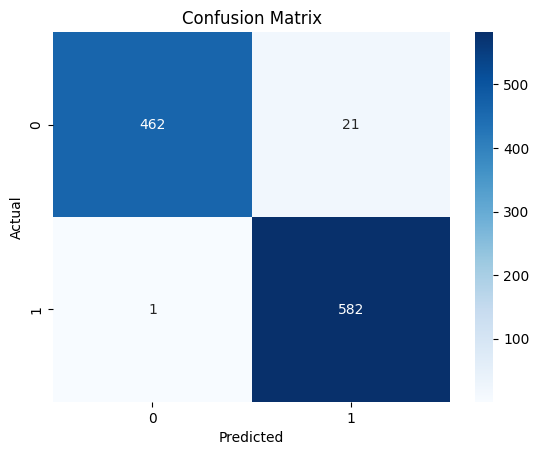

In [17]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()